## Mount Google Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Use cleaned data

In [0]:
DATA_PATH = '/content/drive/My Drive/ALDA-Project/cleaned_data.csv'

## Import required libraries

In [0]:
import pandas as pd
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
import pickle

In [0]:
df = pd.read_csv(DATA_PATH, index_col=0)

## Create a dictionary of words

In [0]:
texts = df['new_msg'].dropna()
texts = [d.split() for d in texts]
common_dictionary = Dictionary(texts)
common_corpus = [common_dictionary.doc2bow(text) for text in texts]

In [0]:
print('Number of unique tokens: %d' % len(common_dictionary))
print('Number of documents: %d' % len(common_corpus))

Number of unique tokens: 568828
Number of documents: 516724


In [0]:
id2word = common_dictionary.id2token
id2word

{}

## Hyperparameters

In [0]:
num_topics = 5
chunksize = 500 
passes = 20 
eval_every = 1  

## Hyperparameter tuning LDA Model

In [0]:
params = {'chunksize':[1000,2000], 'num_topics' = [5,6,7,8,9,10,11,12,13,14,15], 'decay' : [.5,.6,.7]}

In [0]:
coherence_scores = []
i=1
for chunksize in params['chunksize']:
  for decay in params['decay']:
    for num_topics in params['num_topics']:      
      # print('params: ', chunk_size, decay, num_topics)
      lda_model = LdaModel( corpus=common_corpus,alpha='auto', eta='auto', num_topics=num_topics, decay=decay, chunksize=chunksize)
      coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=common_dictionary, coherence='c_v')
      coherence_lda = coherence_model_lda.get_coherence()
      # print('\nCoherence Score: ', coherence_lda, ' for params: ', chunksize, decay, num_topics)
      coherence_scores.append(coherence_lda)
      lda_model.save('/content/drive/My Drive/ALDA-Submission/'+'lda_model'+str(i)+'.pkl')
      i=i+1

In [0]:
k_values= [5,6,7,8,9,10,11,12,13]
coherence_values = [ 0.615465620021121 , 0.5271050837095878 , 0.5271050837095878, 0.645465323069886, 0.634509003334699,  0.645465620067987, 0.5718352988188391, 0.6194962678827957, 0.5989532164229429]

## Plot coherence scores vs number of topics

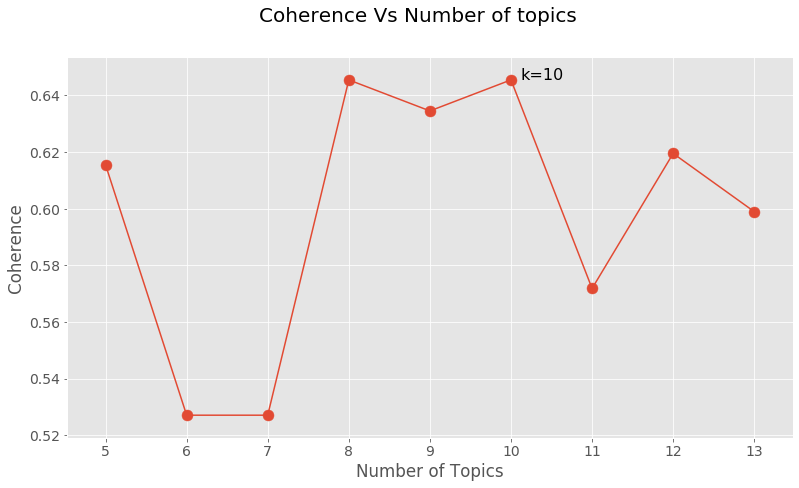

In [0]:
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
matplotlib.rcParams.update({"font.size": 14})

coherences = coherence_values
fig = plt.figure(figsize=(13,7))
fig.suptitle('Coherence Vs Number of topics', fontsize=20)
ax = plt.plot( k_values, coherences )
plt.xticks(k_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence")

plt.scatter( k_values, coherences, s=120)

ymax = max(coherences)
xpos = coherences.index(ymax)
best_k = k_values[xpos]
plt.annotate( "k=%d" % best_k, xy=(best_k, ymax), xytext=(best_k, ymax), textcoords="offset points", fontsize=16)
plt.savefig('/content/drive/My Drive/ALDA-Submission/Plots/LDA-coherence.png')
plt.show()